In [91]:

using Plots
using IterTools
include("numerical_integration.jl")
 
NUM_STEPS=500

function logistic_growth(x,p)
    r,K = p

    x = x[1]
    println(x)
    dx_dt = r*x*(1-(x/K))
    println(dx_dt)
    return dx_dt
end

function SIS(x,p)
    #unpack vector
    β,γ= p 
    S,I = x
    N = S+I
    #calculate differenitals
    #dS = -(β*S*I)/N+γ*I
    #dI = (β*S*I)/N - γ*I
    
    dS = -(β*S*I)+γ*I
    dI = (β*S*I) - γ*I

    dX = [dS dI] #pack differentials into an array
    return dX
end


function SIR(x,p)
    #unpack vector
    β,γ= p 
    S,I,R = x
    N = S+I+R
    #calculate differenitals
    dS = -(β*S*I)/N
    dI = (β*S*I)/N - γ*I
    dR = γ*I
    
    dX = [dS dI dR]#pack differentials into an array
    return dX
end

SIR (generic function with 1 method)

In [92]:
a = ["1", "2"]
permutedims(a,(1,2))

ArgumentError: ArgumentError: no valid permutation of dimensions

In [111]:
#SIS MODEL with 
plot_list = []


β_list = [0.03,0.06,0.1]
#β_list = [0.1,0.2,0.5,0.8]
step_size_list = [0.01,0.5,2.0]

titles = ["step_size: 0.01|β:0.03" "step_size: 0.01|β:0.06" "step_size: 0.01|β:0.1" "step_size: 0.5|β:0.03" "step_size: 0.5|β:0.06" "step_size: 0.5|β:0.1" "step_size: 2.0|β:0.03" "step_size: 2.0|β:0.06" "step_size: 2.0|β:0.1"]#titles = ["β:$(i[1]) step_size:$(i[2])" for i in vec(collect(product(β_list,step_size_list)))]

for step_size in step_size_list
    for β in β_list
        γ = 0.25
        x_0 = [90 10]

        p = [β,γ]
        num_steps = 50

        println("step_size: $step_size\tβ:$β")
        #num_steps = max_time/step_size
        max_time = num_steps*step_size 
        

        time_range,sis_results = ODESolver(SIS,x_0,p,max_time,num_steps,eulers_method)
        sis_matrix = vcat(sis_results...)
        s_,i = sis_matrix[:,1],sis_matrix[:,2]


        sis_euler_ts = plot(time_range,[s,i],labels = ['S' 'I' ])
        push!(plot_list,sis_euler_ts)
    end
end
    
plot(plot_list...,size =(1000,1000),labels =["S" "I"],titles =hcat(titles))
savefig("plots/eulers_method.png")

step_size: 0.01	β:0.03
step_size: 0.01	β:0.06
step_size: 0.01	β:0.1
step_size: 0.5	β:0.03
step_size: 0.5	β:0.06
step_size: 0.5	β:0.1
step_size: 2.0	β:0.03
step_size: 2.0	β:0.06
step_size: 2.0	β:0.1


In [109]:
#SIS MODEL with 
plot_list = []


β_list = [0.03,0.06,0.1]
#β_list = [0.1,0.2,0.5,0.8]
step_size_list = [0.01,0.5,2.0]



for step_size in step_size_list
    for β in β_list
        γ = 0.25
        x_0 = [90 10]

        p = [β,γ]
        num_steps = 50

        println("step_size: $step_size\tβ:$β")
        #num_steps = max_time/step_size
        max_time = num_steps*step_size 
        

        time_range,sis_results = ODESolver(SIS,x_0,p,max_time,num_steps,heuns_method)
        sis_matrix = vcat(sis_results...)
        s,i = sis_matrix[:,1],sis_matrix[:,2]


        sis_euler_ts = plot(time_range,[s,i],labels = ['S' 'I' ])
        push!(plot_list,sis_euler_ts)
    end
end
    
plot(plot_list...,size =(1000,1000),titles = titles)
savefig("plots/heuns_method.png")

step_size: 0.01	β:0.03
step_size: 0.01	β:0.06
step_size: 0.01	β:0.1
step_size: 0.5	β:0.03
step_size: 0.5	β:0.06
step_size: 0.5	β:0.1
step_size: 2.0	β:0.03
step_size: 2.0	β:0.06
step_size: 2.0	β:0.1


step_size: 0.01	β:0.03
step_size: 0.01	β:0.06
step_size: 0.01	β:0.1
step_size: 0.5	β:0.03
step_size: 0.5	β:0.06
step_size: 0.5	β:0.1
step_size: 2.0	β:0.03
step_size: 2.0	β:0.06
step_size: 2.0	β:0.1


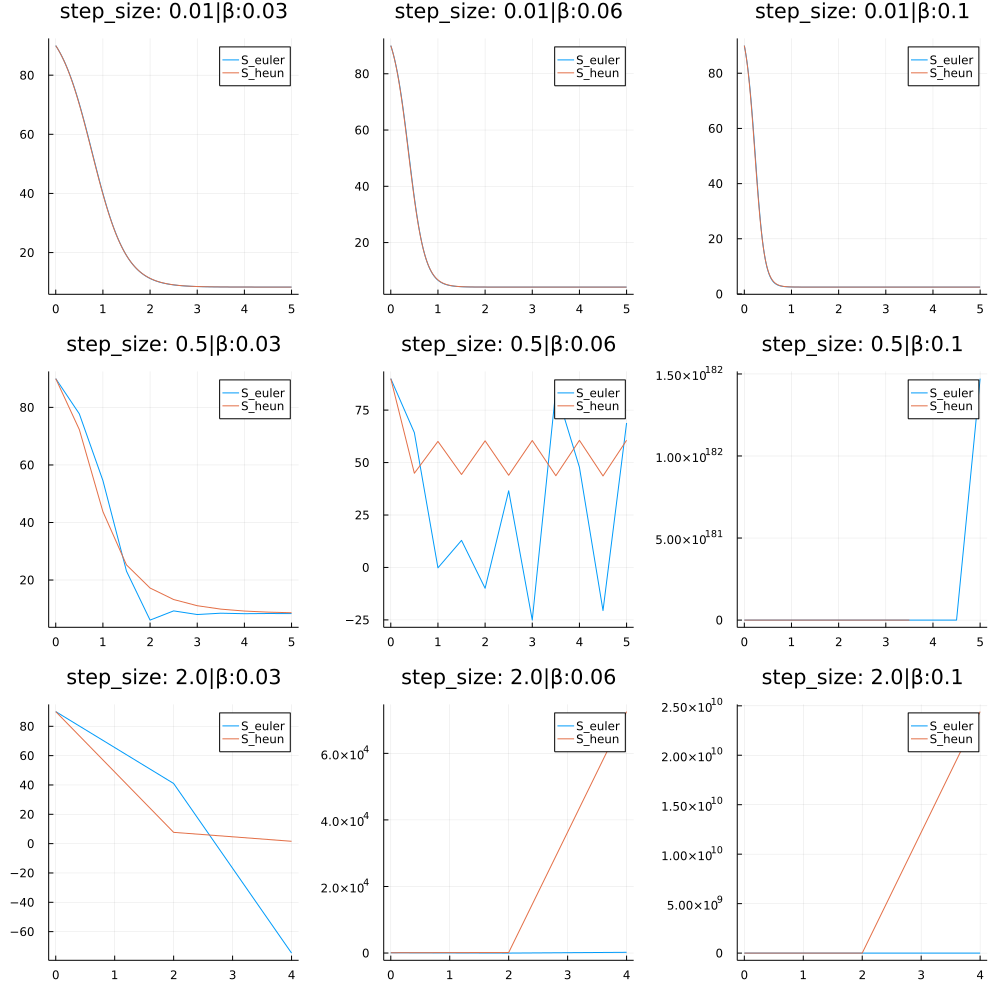

In [125]:
#SIS MODEL with 
plot_list = []


β_list = [0.03,0.06,0.1]
#β_list = [0.1,0.2,0.5,0.8]
step_size_list = [0.01,0.5,2.0]



for step_size in step_size_list
    for β in β_list
        γ = 0.25
        x_0 = [90 10]

        p = [β,γ]
        num_steps = 5

        println("step_size: $step_size\tβ:$β")
        num_steps = max_time/step_size
        max_time = 5
        #max_time = num_steps*step_size 
        

        time_range,sis_euler_results = ODESolver(SIS,x_0,p,max_time,num_steps,eulers_method)
        time_range,sis_heun_results= ODESolver(SIS,x_0,p,max_time,num_steps,heuns_method)

        sis_euler_matrix = vcat(sis_euler_results...)
        s_euler,i_euler = sis_euler_matrix[:,1],sis_euler_matrix[:,2]
        
        sis_heun_matrix = vcat(sis_heun_results...)
        s_heun,i_heun = sis_heun_matrix[:,1],sis_heun_matrix[:,2]


        sis_euler_euler_ts = plot(time_range,[s_euler,s_heun],labels = ["S_euler" "S_heun" ])
        push!(plot_list,sis_euler_euler_ts)

    end
end
    
plot(plot_list...,size =(1000,1000),titles = titles)
#savefig("plots/euler_heun_comp.png")

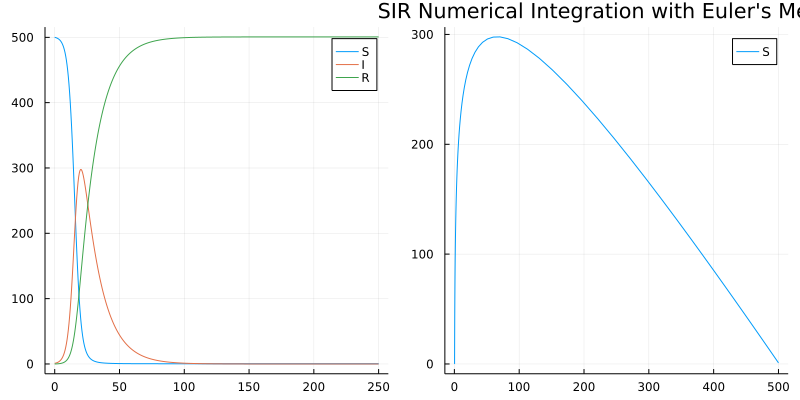

In [96]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 250 
num_steps = NUM_STEPS

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,eulers_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



SIR_euler_ts = plot(time_range,[s,i,r],labels = ['S' 'I' 'R'])
SIR_euler_phase_space = plot(s,i,labels = ['S' 'I'],title = "SIR Numerical Integration with Euler's Method")

plot!(size=(800,400))
plot(SIR_euler_ts,SIR_euler_phase_space,layout = (1,2))
##savefig("plots/sir_euler.png")

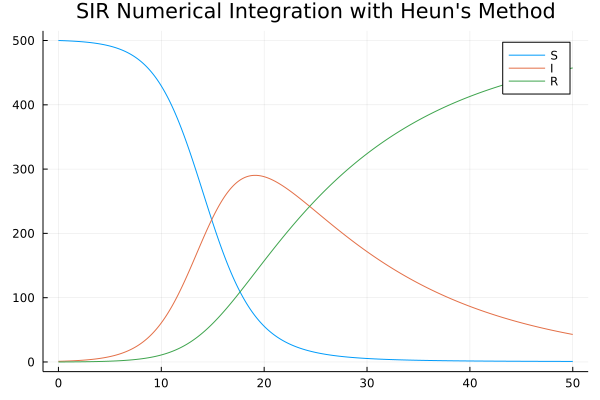

In [97]:
#SIR MODEL with 
x_0 = [500 1 0]
p = [1/2,1/14]
max_time = 50 
num_steps = NUM_STEPS 

time_range,SIR_results = ODESolver(SIR,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
s,i,r = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]



plot(time_range,[s,i,r],labels = ['S' 'I' 'R'],title = "SIR Numerical Integration with Heun's Method")
#savefig("plots/sir_heun.png")

In [98]:
function lorenz(x,p)
    ρ,σ,β= p
    X,Y,Z = x
    dX = σ*(Y-X)
    dY = X*(ρ-Z)-Y
    dZ = (X*Y)-(β*Z)

    return_x = [dX dY dZ]

    return return_x
end

lorenz (generic function with 1 method)

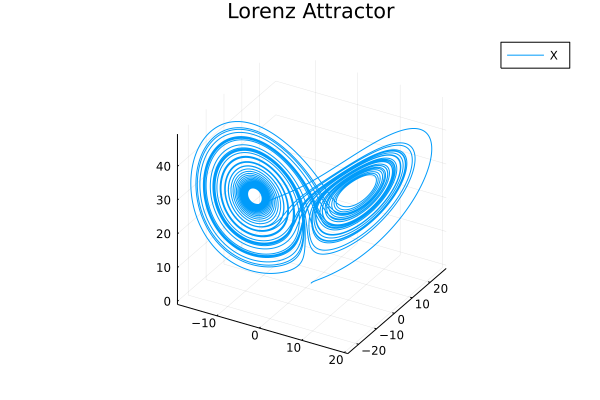

In [99]:
#SIR MODEL with 
x_0 = [1 0.5 0.5]
p = [28,10,8/3]
max_time = 50
num_steps = 50000

time_range,SIR_results = ODESolver(lorenz,x_0,p,max_time,num_steps,heuns_method)
sir_matrix = vcat(SIR_results...)
X,Y,Z = sir_matrix[:,1],sir_matrix[:,2],sir_matrix[:,3]
plot(X,Y,Z,labels = ['X' 'Y' 'Z'],title = "Lorenz Attractor")

In [100]:
function lotka_volterra(x,p)
    α,β,δ,γ= p
    X,Y = x
    dX = (α*X)-(β*X*Y)
    dY = (δ*X*Y)-(γ*Y)

    return_x = [dX dY]

    return return_x
end

lotka_volterra (generic function with 1 method)

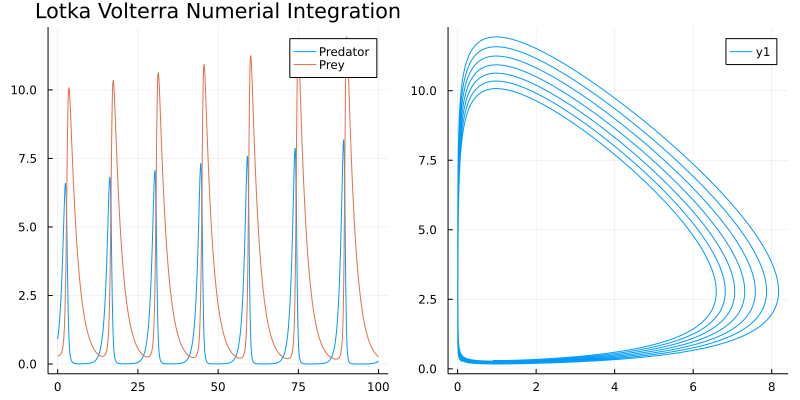

In [101]:
#SIR MODEL with 
x_0 = [.9 .3]
#p = [2/3,4/3,1,1]
p = [1.1,0.4,0.4,0.4]
max_time = 100
num_steps = max_time*100

time_range,lotka_volterra_results = ODESolver(lotka_volterra,x_0,p,max_time,num_steps,eulers_method)
lotka_volterra_matrix = vcat(lotka_volterra_results...)
X,Y = lotka_volterra_matrix[:,1],lotka_volterra_matrix[:,2]



lotka_volterra_ts = plot(time_range,[X,Y],labels = ["Predator" "Prey" ],title = "Lotka Volterra Numerial Integration")
lotka_volterra_phase_space = plot(X,Y,title = "")
plot!(size=(800,400))
plot(lotka_volterra_ts,lotka_volterra_phase_space,layout = (1,2))

In [102]:
function SHO(x,p)
    "Linerized SHO"
    g,L= p
    θ,ω = x
    dω = -g/L*sin(θ)
    dθ =  ω

    return_x = [dθ dω]

    return return_x
end


#SIR MODEL with 
x_0 = [1 0]
p = [9.8,1]
max_time = 20 
num_steps = 500 

time_range,sho_results = ODESolver(SHO,x_0,p,max_time,num_steps,heuns_method)
sho_matrix = vcat(sho_results...)
X,Y = sho_matrix[:,1],sir_matrix[:,2]

plot(time_range,[X,Y],labels = ['X' 'Y' ],title = "Lotka Volterra Numerical Integration with Heun's Method")

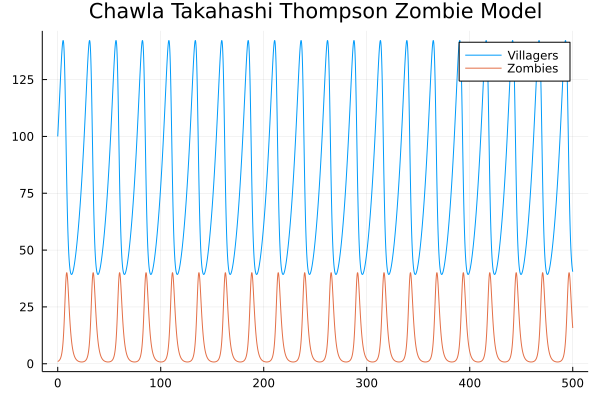

In [103]:
function zombie_model(x,p)

    """
    α_v =  villager birth rate
    α_z = zombie birth rate
    β = infection rate
    γ = zombie death rate
    """

    α_v,α_z,β,γ= p

    V,Z = x
    dV = α_v*V-β*V*Z 
    dZ = α_z+β*V*Z-γ*Z

    return_x = [dV dZ]

    return return_x
end



#SIR MODEL with 

villager_birth_rate = 0.1
#zombie_birth_rate = 0.1
zombie_birth_rate = 0
infection_rate = 0.01
zombie_death_rate = 0.8

x_0 = [100 1]
p = [villager_birth_rate,zombie_birth_rate,infection_rate,zombie_death_rate]
max_time = 500
num_steps = 10000

time_range,sho_results = ODESolver(zombie_model,x_0,p,max_time,num_steps,heuns_method)
sho_matrix = vcat(sho_results...)
X,Y = sho_matrix[:,1],sho_matrix[:,2]

plot(time_range,[X Y],labels = ["Villagers" "Zombies" ],title = "Chawla Takahashi Thompson Zombie Model")

In [104]:
max_time = 100
num_steps

10000